# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# OpenWeatherMap API Key
api_key= weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"City Name")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

City Name
-------------------------------
City not found. Skipping...
Processing Record 1 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=sur
Processing Record 2 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=saskylakh
Processing Record 3 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=punta arenas
Processing Record 4 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=hamilton
Processing Record 5 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=hermanus
Processing Record 6 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=saint-joseph
Processing Record 7 | Oranjestad
http://api.openweathermap.org/d

Processing Record 56 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=alyangula
Processing Record 57 | Altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=altay
Processing Record 58 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=avera
Processing Record 59 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=bredasdorp
Processing Record 60 | Boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=boyolangu
Processing Record 61 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=atuona
Processing Record 62 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=wanning
Pr

Processing Record 112 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=vardo
City not found. Skipping...
Processing Record 113 | Antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=antalaha
Processing Record 114 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=cherskiy
Processing Record 115 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=yerbogachen
Processing Record 116 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=cape town
Processing Record 117 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=carnarvon
Processing Record 118 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 166 | Rio Linda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=rio linda
Processing Record 167 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=new norfolk
Processing Record 168 | Cay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=cay
Processing Record 169 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=lorengau
Processing Record 170 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=port lincoln
Processing Record 171 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=hasaki
Processing Record 172 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3

Processing Record 222 | Waldkirch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=waldkirch
Processing Record 223 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=havre-saint-pierre
Processing Record 224 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=viedma
Processing Record 225 | Acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=acajutla
Processing Record 226 | Kendari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=kendari
Processing Record 227 | Podor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=podor
Processing Record 228 | Catuday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602

Processing Record 278 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=huarmey
Processing Record 279 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=bonavista
Processing Record 280 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=bathsheba
Processing Record 281 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=launceston
Processing Record 282 | Erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=erenhot
Processing Record 283 | Arrondissement du Havre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=havre
Processing Record 284 | El Sauzal de Rodriguez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 333 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=bilma
City not found. Skipping...
Processing Record 334 | Koudougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=koudougou
Processing Record 335 | Ekhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=ekhabi
Processing Record 336 | Buta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=buta
Processing Record 337 | Mentougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=mentougou
Processing Record 338 | Union Hidalgo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=union hidalgo
Processing Record 339 | Wladyslawowo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8

Processing Record 389 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=kamenka
Processing Record 390 | Tupik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=tupik
Processing Record 391 | Charters Towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=charters towers
Processing Record 392 | Hulan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=hulan
Processing Record 393 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=leningradskiy
City not found. Skipping...
Processing Record 394 | Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=batagay-alyta
Processing Record 395 | Tiszakecske
http://api.openweathermap.org/data/2.5/weather

Processing Record 445 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=talnakh
Processing Record 446 | Quibdo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=quibdo
Processing Record 447 | Wanlaweyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=wanlaweyn
Processing Record 448 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=hambantota
Processing Record 449 | Santa Vitoria do Palmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=santa vitoria do palmar
City not found. Skipping...
Processing Record 450 | Copiapo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=copiapo
Processing Record 451 | Nalut
http://api.openweathermap.org/data/2.5/weath

Processing Record 500 | Vilhena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=vilhena
Processing Record 501 | Urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=urumqi
Processing Record 502 | Mount Vernon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=mount vernon
Processing Record 503 | Raja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=raga
Processing Record 504 | La Asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=la asuncion
Processing Record 505 | Senador Guiomard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=senador guiomard
Processing Record 506 | Mangrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671

Processing Record 556 | Fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=87f9f9525dc671a6a602f3055b7ae98e&q=fayaoue


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('Output/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sur,58,OM,1581572245,61,22.57,59.53,69.08,19.64
1,Saskylakh,97,RU,1581572246,88,71.92,114.08,-10.12,6.20
2,Punta Arenas,40,CL,1581572106,75,-53.15,-70.92,46.40,13.87
3,Hamilton,90,US,1581572096,93,39.18,-84.53,36.00,3.36
4,Hermanus,32,ZA,1581572125,93,-34.42,19.23,63.00,3.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

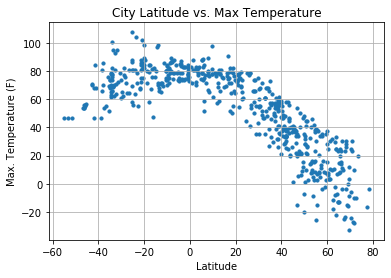

In [75]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output/pic1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

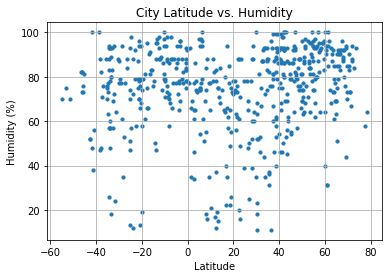

In [76]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output/pic2.png")


# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

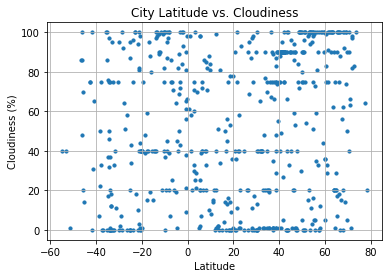

In [77]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output/pic3.png")


# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

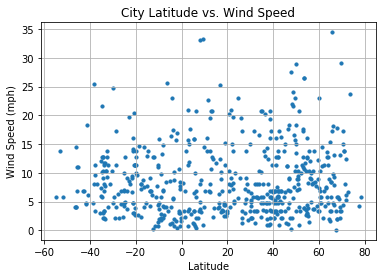

In [78]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output/pic4.png")


# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = weather_data.loc[weather_data["Lat"]>0]
southern_hemi = weather_data.loc[weather_data["Lat"]<0]

# southern_hemi.head()
southern_hemi.head()
northern_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sur,58,OM,1581572245,61,22.57,59.53,69.08,19.64
1,Saskylakh,97,RU,1581572246,88,71.92,114.08,-10.12,6.20
3,Hamilton,90,US,1581572096,93,39.18,-84.53,36.00,3.36
6,Oranjestad,40,AW,1581572252,83,12.52,-70.03,78.80,19.46
8,Dikson,100,RU,1581572254,93,73.51,80.55,19.44,23.69


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

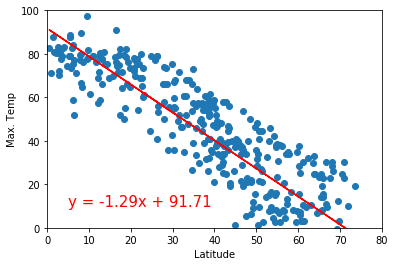

<Figure size 432x288 with 0 Axes>

In [79]:
#Create a Scatter Plot for Max Temp vs Lattitude 
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()
plt.savefig("output/pic5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

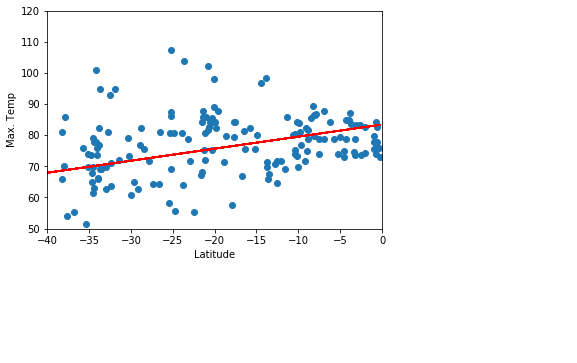

<Figure size 432x288 with 0 Axes>

In [80]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(50, 120)
plt.xlim(-40, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()
plt.savefig("output/pic6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

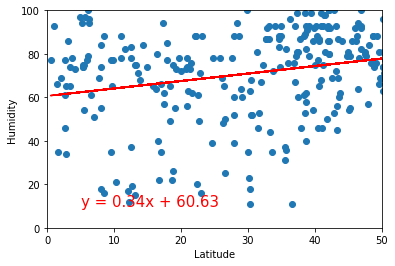

<Figure size 432x288 with 0 Axes>

In [81]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 50)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()
plt.savefig("output/pic7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

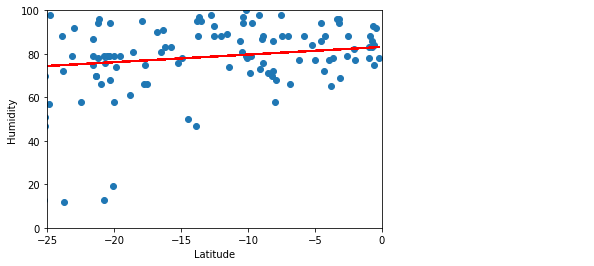

<Figure size 432x288 with 0 Axes>

In [82]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(-25,0)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()
plt.savefig("output/pic8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

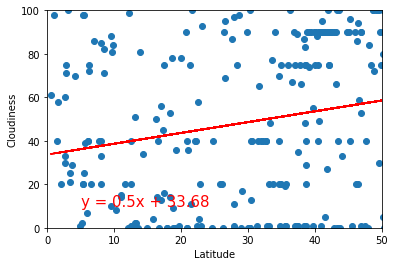

<Figure size 432x288 with 0 Axes>

In [83]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 50)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
plt.savefig("output/pic9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

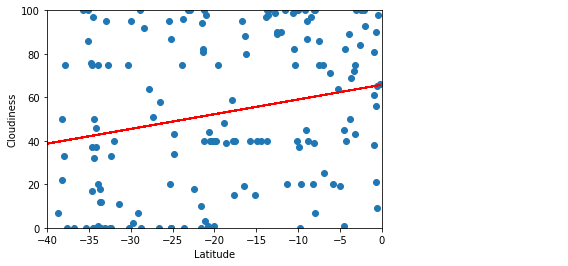

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(-40,0)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
plt.savefig("output/pic10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

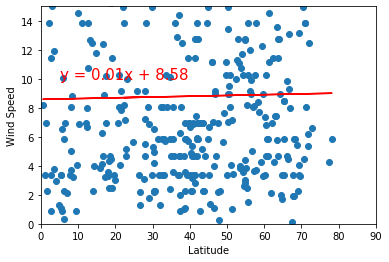

<Figure size 432x288 with 0 Axes>

In [85]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,15)
plt.xlim(0, 90)

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()
plt.savefig("output/pic11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

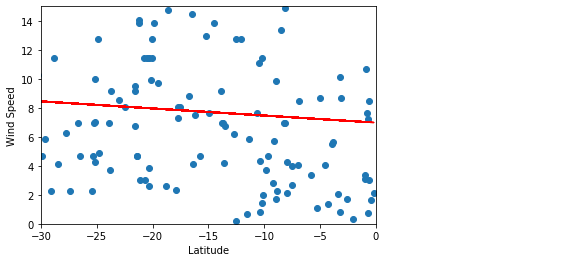

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,15)
plt.xlim(-30,0)

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()
plt.savefig("output/pic12.png")

In [ ]:
Observations -

Temperatures are higher near the equator 
Cloudiness and wind speed doesn't seem to have any correlation with latitude 
